In [17]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
zero = np.zeros((100,100))

In [19]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('conjecture_results/result_3.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,contaminated,ARMA,ARMA_Order,ARMA_Train_loss,ARMA_Valid_loss,AR,AR_Order,Informer,Informer_para,Informer_lr,RNN
0,2,"[0.2656211702973496, -0.8314623239980846, -0.3...","[0.6165826130636092, -0.04267013623445495, -0....","[15.446473530665271, 18.3389297751814, 19.5893...","[-0.20221591159563276, -0.04545897219941853, -...","(2, 0, 2)",2.861746,0.949478,"[-0.2714106679358946, 0.060143647193465155, -0...","(3, 0, 0)","[0.3595454692840576, 0.188635915517807, -0.645...","(10, 2)",0.0010,"[0.5775817632675171, 0.2086889147758484, -0.70..."
1,3,"[-0.480500230327959, -0.10288974808592663, -0....","[-0.6332714291518686, -0.16386451575202474, -0...","[15.025866526638717, 18.612266104716195, 10.68...","[-0.4724774238591267, -0.5355404176047582, -0....","(4, 0, 0)",2.297433,1.072303,"[-0.4724774238591267, -0.5355404176047582, -0....","(4, 0, 0)","[-0.19739395380020142, -0.12950986623764038, 0...","(10, 2)",0.0010,"[-0.5142478942871094, -0.3093360960483551, -0...."
2,4,"[0.738707960379525, 0.3575563661975284, 0.2155...","[0.11702006471055498, 0.6801979280242475, 0.01...","[18.146752938826555, 15.57943341670122, 18.663...","[0.6289780369254858, 0.6488627018048516, 0.473...","(3, 0, 1)",2.032979,106.975337,"[0.693381820828348, 0.6555114493234283, 0.4652...","(3, 0, 0)","[-0.034991614520549774, 0.054165489971637726, ...","(50, 10)",0.0001,"[1.919451355934143, 21.606111526489258, 23.908..."
3,5,"[0.3315127974901487, -0.028278250345896316, 0....","[-0.2550283840928068, 0.45902698953655213, -0....","[16.27033079870604, 17.823919030466516, 14.522...","[0.30221559058662373, 0.3143836946707344, 0.09...","(1, 0, 1)",2.648890,0.807425,"[0.33478968515372776, 0.3297540940535778, 0.07...","(3, 0, 0)","[-0.13732631504535675, 0.2975209653377533, -0....","(10, 2)",0.0010,"[-0.324825257062912, 0.6439814567565918, -0.31..."
4,9,"[1.317522025391624, 1.6261160935132206, 1.5922...","[0.664696913084039, 0.9851735688496045, 1.1335...","[18.945801656896084, 10.144163347013182, 12.00...","[0.5731194312383586, 1.0445981585303308, 1.269...","(2, 0, 4)",0.946571,82.632157,"[0.44193008578773096, 1.025637320620424, 1.458...","(2, 0, 0)","[0.6641668081283569, 0.9746787548065186, 1.298...","(10, 2)",0.0010,"[0.36765116453170776, 0.850780189037323, 1.272..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,90,"[-0.1946352157108051, 0.35981230288676636, 0.3...","[0.2594634953379944, -0.3243669633798023, 0.52...","[15.658986953675115, 15.893755881247369, 17.11...","[-0.21149657575807707, -0.22677231806542075, 0...","(2, 0, 1)",2.784700,0.793804,"[-0.3090863146952276, -0.2839312310714577, 0.1...","(3, 0, 0)","[-0.14900091290473938, -0.3993854522705078, 0....","(10, 2)",0.0010,"[0.2631860375404358, -0.35466820001602173, 0.4..."
95,95,"[-0.9013235706496914, -1.4951671138239895, -0....","[0.02833873112210733, -0.915492936210745, -1.0...","[11.816078783643976, 11.093637464406676, 17.44...","[0.7442636770928159, -0.2525252948286775, -0.8...","(3, 0, 2)",1.242475,45.487499,"[0.7776505075505105, -0.31574539859263817, -1....","(3, 0, 0)","[0.16868673264980316, -0.8544966578483582, -0....","(10, 2)",0.0010,"[-0.0015063881874084473, -1.2121825218200684, ..."
96,97,"[2.096768549452959, 0.8687236063515692, -0.713...","[1.159308995056429, 1.5171140519247444, 0.1101...","[15.944639245689427, 18.30490601854461, 9.1821...","[1.0587640501222635, 1.6343823330658847, 1.161...","(1, 0, 1)",2.827813,0.946258,"[1.1927878728995176, 1.8067763475536358, 1.202...","(2, 0, 0)","[0.8382740020751953, 1.3787070512771606, -0.22...","(10, 2)",0.0010,"[1.1048293113708496, 1.5391499996185303, 0.013..."
97,86,"[1.1156257350357162, 2.0052521987419643, 1.941...","[0.1206778141870388, 1.0552868279421967, 1.477...","[17.40095907091533, 17.713879312849752, 12.912...","[-0.3270325800665579, 0.5389704436083383, 1.29...","(3, 0, 2)",1.167686,29.833177,"[-0.1512806085422129, 1.0557903986829904, 1.89...","(1, 0, 0)","[0.026158466935157776, 1.4870525598526, 1.3803...","(10, 2)",0.0010,"[0.080

In [20]:
# ar_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# ar_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [21]:
# zero_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')
# zero_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')

In [22]:
informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [23]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([10, 10, 50, 10, 10, 10, 50, 10, 20, 10, 10, 50, 10, 50, 20, 10, 20,
       10, 50, 10, 10, 20, 50, 20, 10, 10, 50, 50, 20, 10, 20, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 20, 50, 10, 50, 10, 10, 10, 10, 10, 20, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 10, 10, 10, 50,
       20, 10, 10, 10, 10, 20, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 50, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [24]:
informer_lr_select

array([0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.0001, 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.01  ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0001, 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.0001, 0.01  , 0.001 , 0.0001, 0.001 ,
       0.001 , 0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 ])

In [43]:
# Convert the 'contaminated' and prediction columns to numpy arrays
contaminated_values = np.array(df['contaminated'].apply(ast.literal_eval).to_list())
arma_values = np.array(df['ARMA'].apply(ast.literal_eval).to_list())
informer_values = np.array(df['Informer'].apply(ast.literal_eval).to_list())
rnn_values = np.array(df['RNN'].apply(ast.literal_eval).to_list())

# Calculate correlations for each time step
arma_corr = [np.corrcoef(contaminated_values[:, i], arma_values[:, i])[0, 1] for i in range(contaminated_values.shape[1])]
informer_corr = [np.corrcoef(contaminated_values[:, i], informer_values[:, i])[0, 1] for i in range(contaminated_values.shape[1])]
rnn_corr = [np.corrcoef(contaminated_values[:, i], rnn_values[:, i])[0, 1] for i in range(contaminated_values.shape[1])]

arma_corr[:10], informer_corr[:10], rnn_corr[:10]


([0.10678260623629983,
  0.08957128469085686,
  -0.07937392384791042,
  -0.05579927247664706,
  0.18921534924788327,
  -0.08158660467727315,
  0.048472612324318785,
  0.09378583754829177,
  0.19099347053785196,
  0.16566329023267426],
 [0.24743486123030314,
  0.02360822275649154,
  -0.09556712567643215,
  -0.08987374501869488,
  0.19960640749012135,
  -0.11662621468859252,
  0.10611093305721048,
  0.06903902796405201,
  0.23245382431485206,
  0.14545454083130147],
 [0.27737637015223066,
  0.04249546831392495,
  0.10164251592976248,
  -0.10521580303211883,
  0.23677132411683424,
  -0.10689635137131144,
  0.130604535653325,
  0.16831582861458716,
  0.24806388086287653,
  0.17356051657729157])

In [42]:
[
    [np.mean(arma_corr[:10]), np.mean(informer_corr[:10]), np.mean(rnn_corr[:10])],
    [np.mean(arma_corr[10:]), np.mean(informer_corr[10:]), np.mean(rnn_corr[10:])],
    [np.mean(arma_corr), np.mean(informer_corr), np.mean(rnn_corr)],
]

[[0.06677246498163461, 0.07216407322606125, 0.11667182858174023],
 [-0.00024552216596897454, 0.006854460096755967, 0.006263792891215119],
 [0.006456276548791381, 0.013385421409686493, 0.017304596460267628]]

In [25]:


# Plotting the array
plt.figure(figsize=(100, 100))
# plt.plot(zero_mse,label = 'Zero', marker='o')
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


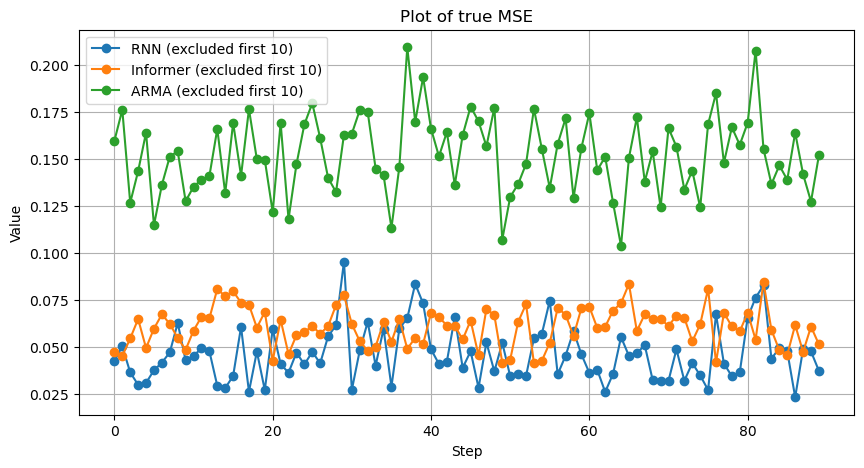

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(zero_mse_true,label = 'Zero', marker='o')
plt.plot(rnn_mse_true[10:], label='RNN (excluded first 10)', marker='o')  # Excluding the first 10
plt.plot(informer_mse_true[10:], label='Informer (excluded first 10)', marker='o')  # Excluding the first 10
plt.plot(arma_mse_true[10:], label='ARMA (excluded first 10)', marker='o')  # Excluding the first 10
# plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [27]:
mean_rnn_mse_true = np.mean(rnn_mse_true)
mean_informer_mse_true = np.mean(informer_mse_true)
mean_arma_mse_true = np.mean(arma_mse_true)
(mean_rnn_mse_true,mean_informer_mse_true,mean_arma_mse_true)

(0.17454319252745804, 0.05981390201480741, 0.15264726174375384)

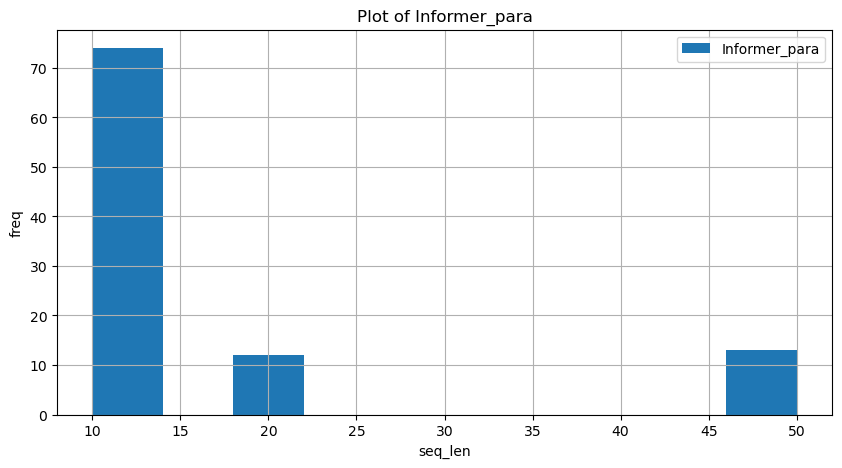

In [28]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

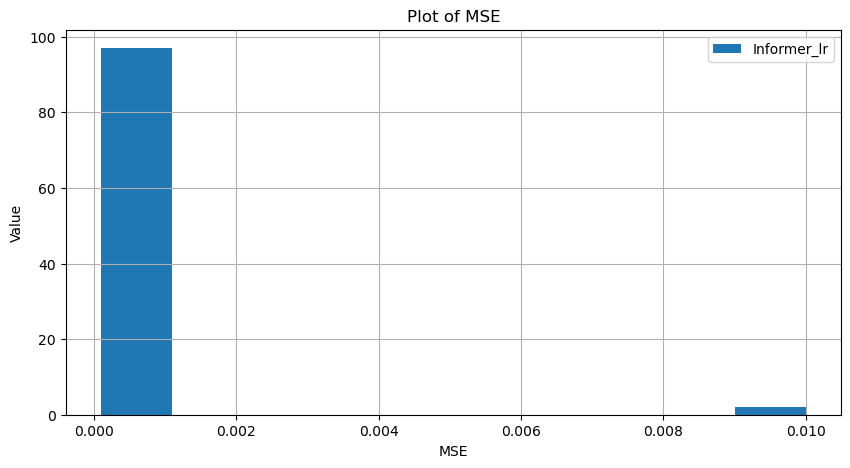

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()